In [107]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import tqdm
from tqdm.auto import tqdm

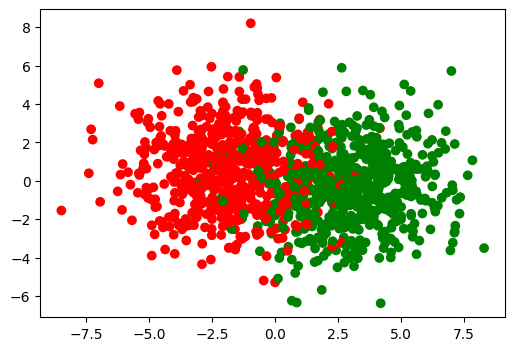

In [108]:
# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=2, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
type(X_train)

numpy.ndarray

In [110]:
if type(X_train) != torch.Tensor:
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)

    y_train = torch.FloatTensor(y_train).view(-1, 1)
    y_test = torch.FloatTensor(y_test).view(-1, 1)

train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=70, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=70, shuffle=False)

In [111]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, X):
        return self.layers(X)

In [112]:
model = Net()

In [113]:
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [125]:
def train(model, loader, loss, optimizer, num_epoch):
    total_loss = []

    for epoch in tqdm(range(num_epoch)):
        epoch_loss = []

        for X, y in loader:
            y_pred = model(X)
            print(y_pred.shape, y.shape)
            print(y_pred, y)
            loss_value = loss(y_pred, y)
            print(loss_value)
            epoch_loss.append(loss_value.item())

            # Вычисление производных весов
            loss_value.backward()

            # Шаг изменения весов
            optimizer.step()

            # Обнуление производных, сохраненных в оптимизаторе
            optimizer.zero_grad()

        total_loss.append(np.mean(epoch_loss))

        print(f'loss: {np.mean(epoch_loss)}')
    return total_loss


    

In [126]:
train(model, train_loader, loss, optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([70, 1]) torch.Size([70, 1])
tensor([[0.9977],
        [0.9313],
        [0.9940],
        [0.7278],
        [0.0021],
        [0.9998],
        [0.0051],
        [0.0816],
        [0.6095],
        [0.9732],
        [0.0075],
        [0.0684],
        [0.8864],
        [0.0468],
        [0.0199],
        [0.9273],
        [0.4607],
        [0.9929],
        [0.1277],
        [0.9988],
        [0.9440],
        [0.1544],
        [0.0196],
        [0.9174],
        [0.9705],
        [0.0827],
        [0.4732],
        [0.0761],
        [0.0192],
        [0.0045],
        [0.0124],
        [0.9870],
        [0.0973],
        [0.0572],
        [0.0467],
        [0.9848],
        [0.0299],
        [0.9317],
        [0.0623],
        [0.4575],
        [0.0130],
        [0.9928],
        [0.9656],
        [0.8249],
        [0.9539],
        [0.0563],
        [0.6974],
        [0.0038],
        [0.0857],
        [0.8351],
        [0.3437],
        [0.8297],
        [0.9996],
      

[0.2572149506637028,
 0.25431979979787556,
 0.25520806440285276,
 0.2577095382979938,
 0.25936414301395416,
 0.25607555572475704,
 0.2549882648246629,
 0.25690186449459623,
 0.2567041963338852,
 0.25664043532950537,
 0.2570701017975807,
 0.2536078840494156,
 0.25432258578283445,
 0.2560288341982024,
 0.25355495299611774,
 0.25613020254032953,
 0.25833544081875254,
 0.25499072138752255,
 0.25407096850020544,
 0.2555579479251589,
 0.25369837135076523,
 0.25674897858074736,
 0.2555803300014564,
 0.2557534873485565,
 0.2577466847641127,
 0.25436159276536535,
 0.254832210285323,
 0.2546462874327387,
 0.2553987002798489,
 0.25388154281037195,
 0.25580975519759314,
 0.2560053425175803,
 0.25838576150791986,
 0.2547338604927063,
 0.2541413222040449,
 0.25604462570377756,
 0.2537143273012979,
 0.25817406496831347,
 0.25685126547302517,
 0.2558649831584522,
 0.2530042348163469,
 0.256818987429142,
 0.25491741406066076,
 0.2554175396050726,
 0.25610933133534025,
 0.2587291720722403,
 0.2587470997

In [116]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = y_pred.tolist()

y_pred_final = np.array([int(x[0] > 0.5) for x in y_pred])

In [117]:
colors = ("red", "green")
colored_y = np.zeros(len(y_pred_final), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y_pred_final.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

In [118]:
asa = torch.tensor(y_pred).reshape(240)
ada = y_test.reshape(240)

In [119]:
print(loss(asa, ada).item())

0.2495269924402237
